# Assignment-11-Text Mining-02-Amazon Product Reviews


In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
# Import extracted amazon reviews Dataset (How to Extract amazon reviews - Refer Extract Amazon Reviews using Scrapy.ipynb)
reviews=pd.read_csv('Amazonreview.csv')
reviews

,title,content,date,variant,images,verified,author,rating,product,url
0,Look just like the photo,"I love the shoes they are true to size , I wea...",18 Sep 2018,Size: 8 Color: White/Metallic Silver/Dark Grey,https://images-na.ssl-images-amazon.com/images...,Yes,Diane Johnson,5.0,Nike Women's Reax Run 5 Running Shoes,https://www.amazon.com/Nike-Womens-Reax-Runnin...
1,After 20 returns,Just writing a rare review on these . I love N...,08 May 2019,Size: 10 Color: White/Metallic Silver/Dark Grey,https://images-na.ssl-images-amazon.com/images...,Yes,sherlain miranda,4.0,Nike Women's Reax Run 5 Running Shoes,https://www.amazon.com/Nike-Womens-Reax-Runnin...
2,Half size up :),"I have only run in them a couple of times, but...",14 Dec 2018,Size: 9.5 Color: White/Metallic Silver/Dark Grey,https://images-na.ssl-images-amazon.com/images...,Yes,Blondie,5.0,Nike Women's Reax Run 5 Running Shoes,https://www.amazon.com/Nike-Womens-Reax-Runnin...
3,Surprisingly comfortable,I have a very hard time finding shoes that are...,26 Aug 2018,Size: 8 Color: White/Metallic Silver/Dark Grey,NaN,Yes,E Diaz,5.0,Nike Women's Reax Run 5 Running Shoes,https://www.amazon.com/Nike-Womens-Reax-Runnin...
4,Cute and Stylish..,Great workout shoes. Very comfortable.,04 Sep 2017,NaN,https://images-na.ssl-images-amazon.com/images...,Yes,Angel Buchanan,5.0,Nike Women's Reax Run 5 Running Shoes,https://www.amazon.com/Nike-Womens-Reax-Runnin...
5,"Great, Comfortable Shoe",This is my second pair. They are the most com...,18 Jul 2017,Size: 9 Color: White/Metallic Silver/Dark Grey,NaN,Yes,msgrnbay,5.0,Nike Women's Reax Run 5 Running Shoes,https://www.amazon.com/Nike-Womens-Reax-Runnin...
6,Great shoes,This is my second pair. I think these shoes ar...,02 Aug 2017,Size: 9 Color: White/Metallic Silver/Dark Grey,NaN,Yes,Amy Klein,5.0,Nike Women's Reax Run 5 Running Shoes,https://www.amazon.com/Nike-Womens-Reax-Runnin...
7,Loving these shoes,I'm really loving these shoe's. A little price...,15 Jul 2019,Size: 6.5 Color: White/Metallic Silver/Dark Grey,https://images-na.ssl-images-amazon.com/images...,Yes,stephanie stone,5.0,Nike Women's Reax Run 5 Running Shoes,https://www.amazon.com/Nike-Womens-Reax-Runnin...
8,Gorgeous shoes,Gorgeous shoes! I love it. Nice for running,24 Oct 2019,Size: 6.5 Color: White/Metallic Silver/Dark Grey,https://images-na.ssl-images-amazon.com/images...,Yes,Kamila,5.0,Nike Women's Reax Run 5 Running Shoes,https://www.amazon.com/Nike-Womens-Reax-Runnin...
9,Three Stars,Look great but my feet are killing me during m...,02 Aug 2018,Size: 8.5 M US Color: White/Metallic Silver/Da...,NaN,Yes,Michelle Finnegan,3.0,Nike Women's Reax Run 5 Running Shoes,https://www.amazon.com/Nike-Womens-Reax-Runnin...


# Text Preprocessing


In [6]:
reviews=[content.strip() for content in reviews.content] # remove both the leading and the trailing characters
reviews=[content for content in reviews if content] # removes empty strings, because they are considered in Python as False
reviews[0:10]

['I love the shoes they are true to size , I wear a 7 1/2 but I ordered a 8 to allow a little extra room and I got just that',
 'Just writing a rare review on these . I love Nike’s but my feet don’t usually. So I’ve ordered and returned a lot. Tried again lol and these ARE AMAZING comfortable. So much that I may order 3 more this year just to have them. The color is so cute and clean and sporty. I’m 99.9% sure I’ve dinally found a pair of Nikes I’m not going to return , fingers crossed 🤞😊',
 'I have only run in them a couple of times, but so far they feel great. I normally wear a size 9, and I ordered a 9.5, and I’m glad I did. There is plenty of room, but not too much. The only thing that will take me getting used to is that they are slightly bulkier than my ASICS. Like any running shoes, I’m sure it will take a little bit of time to work out the stiffness and fully break them in, but they are amazing!',
 'I have a very hard time finding shoes that are comfortable for me, I have sever

In [7]:
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text

"I love the shoes they are true to size , I wear a 7 1/2 but I ordered a 8 to allow a little extra room and I got just that Just writing a rare review on these . I love Nike’s but my feet don’t usually. So I’ve ordered and returned a lot. Tried again lol and these ARE AMAZING comfortable. So much that I may order 3 more this year just to have them. The color is so cute and clean and sporty. I’m 99.9% sure I’ve dinally found a pair of Nikes I’m not going to return , fingers crossed 🤞😊 I have only run in them a couple of times, but so far they feel great. I normally wear a size 9, and I ordered a 9.5, and I’m glad I did. There is plenty of room, but not too much. The only thing that will take me getting used to is that they are slightly bulkier than my ASICS. Like any running shoes, I’m sure it will take a little bit of time to work out the stiffness and fully break them in, but they are amazing! I have a very hard time finding shoes that are comfortable for me, I have severe fibromyalgi

In [12]:
# Remove Punctuations 
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'I love the shoes they are true to size  I wear a 7 12 but I ordered a 8 to allow a little extra room and I got just that Just writing a rare review on these  I love Nike’s but my feet don’t usually So I’ve ordered and returned a lot Tried again lol and these ARE AMAZING comfortable So much that I may order 3 more this year just to have them The color is so cute and clean and sporty I’m 999 sure I’ve dinally found a pair of Nikes I’m not going to return  fingers crossed 🤞😊 I have only run in them a couple of times but so far they feel great I normally wear a size 9 and I ordered a 95 and I’m glad I did There is plenty of room but not too much The only thing that will take me getting used to is that they are slightly bulkier than my ASICS Like any running shoes I’m sure it will take a little bit of time to work out the stiffness and fully break them in but they are amazing I have a very hard time finding shoes that are comfortable for me I have severe fibromyalgia with no help from medi

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['I', 'love', 'the', 'shoes', 'they', 'are', 'true', 'to', 'size', 'I', 'wear', 'a', '7', '12', 'but', 'I', 'ordered', 'a', '8', 'to', 'allow', 'a', 'little', 'extra', 'room', 'and', 'I', 'got', 'just', 'that', 'Just', 'writing', 'a', 'rare', 'review', 'on', 'these', 'I', 'love', 'Nike', '’', 's', 'but', 'my', 'feet', 'don', '’', 't', 'usually', 'So']


In [15]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Suresh
[nltk_data]     Krishnan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Suresh
[nltk_data]     Krishnan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['I', 'love', 'the', 'shoes', 'they', 'are', 'true', 'to', 'size', 'I', 'wear', 'a', '7', '12', 'but', 'I', 'ordered', 'a', '8', 'to', 'allow', 'a', 'little', 'extra', 'room', 'and', 'I', 'got', 'just', 'that', 'Just', 'writing', 'a', 'rare', 'review', 'on', 'these', 'I', 'love', 'Nike', '’', 's', 'but', 'my', 'feet', 'don', '’', 't', 'usually', 'So']


In [17]:
len(text_tokens)


1225

In [18]:
# Remove stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['love', 'shoes', 'true', 'size', 'wear', '7', '12', 'ordered', '8', 'allow', 'little', 'extra', 'room', 'got', 'Just', 'writing', 'rare', 'review', 'love', 'Nike', '’', 'feet', '’', 'usually', 'So', '’', 'ordered', 'returned', 'lot', 'Tried', 'lol', 'ARE', 'AMAZING', 'comfortable', 'So', 'much', 'may', 'order', '3', 'year', 'color', 'cute', 'clean', 'sporty', '’', '999', 'sure', '’', 'dinally', 'found', 'pair', 'Nikes', '’', 'going', 'return', 'fingers', 'crossed', '🤞😊', 'run', 'couple', 'times', 'far', 'feel', 'great', 'normally', 'wear', 'size', '9', 'ordered', '95', '’', 'glad', 'There', 'plenty', 'room', 'much', 'thing', 'take', 'getting', 'used', 'slightly', 'bulkier', 'ASICS', 'Like', 'running', 'shoes', '’', 'sure', 'take', 'little', 'bit', 'time', 'work', 'stiffness', 'fully', 'break', 'amazing', 'hard', 'time', 'finding', 'shoes', 'comfortable', 'severe', 'fibromyalgia', 'help', 'medications', 'nothing', 'works', 'So', 'constantly', 'looking', 'comfortable', 'clothing', 'snea

In [19]:
# Normalize the data
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['love', 'shoes', 'true', 'size', 'wear', '7', '12', 'ordered', '8', 'allow', 'little', 'extra', 'room', 'got', 'just', 'writing', 'rare', 'review', 'love', 'nike', '’', 'feet', '’', 'usually', 'so', '’', 'ordered', 'returned', 'lot', 'tried', 'lol', 'are', 'amazing', 'comfortable', 'so', 'much', 'may', 'order', '3', 'year', 'color', 'cute', 'clean', 'sporty', '’', '999', 'sure', '’', 'dinally', 'found', 'pair', 'nikes', '’', 'going', 'return', 'fingers', 'crossed', '🤞😊', 'run', 'couple', 'times', 'far', 'feel', 'great', 'normally', 'wear', 'size', '9', 'ordered', '95', '’', 'glad', 'there', 'plenty', 'room', 'much', 'thing', 'take', 'getting', 'used', 'slightly', 'bulkier', 'asics', 'like', 'running', 'shoes', '’', 'sure', 'take', 'little', 'bit', 'time', 'work', 'stiffness', 'fully', 'break', 'amazing', 'hard', 'time', 'finding', 'shoes', 'comfortable', 'severe', 'fibromyalgia', 'help', 'medications', 'nothing', 'works', 'so', 'constantly', 'looking', 'comfortable', 'clothing', 'snea

In [20]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['love', 'shoe', 'true', 'size', 'wear', '7', '12', 'order', '8', 'allow', 'littl', 'extra', 'room', 'got', 'just', 'write', 'rare', 'review', 'love', 'nike', '’', 'feet', '’', 'usual', 'so', '’', 'order', 'return', 'lot', 'tri', 'lol', 'are', 'amaz', 'comfort', 'so', 'much', 'may', 'order', '3', 'year', 'color', 'cute', 'clean', 'sporti', '’', '999', 'sure', '’', 'dinal', 'found', 'pair', 'nike', '’', 'go', 'return', 'finger', 'cross', '🤞😊', 'run', 'coupl', 'time', 'far', 'feel', 'great', 'normal', 'wear', 'size', '9', 'order', '95', '’', 'glad', 'there', 'plenti', 'room', 'much', 'thing', 'take', 'get', 'use', 'slightli', 'bulkier', 'asic', 'like', 'run', 'shoe', '’', 'sure', 'take', 'littl', 'bit', 'time', 'work', 'stiff', 'fulli', 'break', 'amaz', 'hard', 'time', 'find', 'shoe', 'comfort', 'sever', 'fibromyalgia', 'help', 'medic', 'noth', 'work', 'so', 'constantli', 'look', 'comfort', 'cloth', 'sneaker', 'usual', 'nike', 'isnt', 'good', 'decid', 'give', 'pair', 'tri', 'happi', 'not

In [21]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

love shoes true size wear 7 12 ordered 8 allow little extra room got just writing rare review love nike ’ feet ’ usually so ’ ordered returned lot tried lol are amazing comfortable so much may order 3 year color cute clean sporty ’ 999 sure ’ dinally found pair nikes ’ going return fingers crossed 🤞😊 run couple times far feel great normally wear size 9 ordered 95 ’ glad there plenty room much thing take getting used slightly bulkier asics like running shoes ’ sure take little bit time work stiffness fully break amazing hard time finding shoes comfortable severe fibromyalgia help medications nothing works so constantly looking comfortable clothing sneakers usually nike isnt good deciding give pair try happy not nice looking really comfortable wore day today lot walking zero issues feet hurting worth extra money great workout shoes very comfortable this second pair they comfortable tennis shoes feet day dont hurt normally wear 85 shoe wear 9 find toe box wider comfortable especially wear

In [22]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['love', 'shoe', 'true', 'size', 'wear', '7', '12', 'order', '8', 'allow', 'little', 'extra', 'room', 'got', 'just', 'write', 'rare', 'review', 'love', 'nike', "'", 'foot', "'", 'usually', 'so', "'", 'order', 'return', 'lot', 'try', 'lol', 'be', 'amazing', 'comfortable', 'so', 'much', 'may', 'order', '3', 'year', 'color', 'cute', 'clean', 'sporty', "'", '999', 'sure', "'", 'dinally', 'find', 'pair', 'nike', "'", 'go', 'return', 'finger', 'cross', '🤞', '😊', 'run', 'couple', 'time', 'far', 'feel', 'great', 'normally', 'wear', 'size', '9', 'order', '95', "'", 'glad', 'there', 'plenty', 'room', 'much', 'thing', 'take', 'getting', 'use', 'slightly', 'bulky', 'asic', 'like', 'running', 'shoe', "'", 'sure', 'take', 'little', 'bit', 'time', 'work', 'stiffness', 'fully', 'break', 'amazing', 'hard', 'time', 'find', 'shoe', 'comfortable', 'severe', 'fibromyalgia', 'help', 'medication', 'nothing', 'work', 'so', 'constantly', 'look', 'comfortable', 'clothing', 'sneaker', 'usually', 'nike', 'be', 'n

In [23]:
clean_reviews=' '.join(lemmas)
clean_reviews

"love shoe true size wear 7 12 order 8 allow little extra room got just write rare review love nike ' foot ' usually so ' order return lot try lol be amazing comfortable so much may order 3 year color cute clean sporty ' 999 sure ' dinally find pair nike ' go return finger cross 🤞 😊 run couple time far feel great normally wear size 9 order 95 ' glad there plenty room much thing take getting use slightly bulky asic like running shoe ' sure take little bit time work stiffness fully break amazing hard time find shoe comfortable severe fibromyalgia help medication nothing work so constantly look comfortable clothing sneaker usually nike be not good deciding give pair try happy not nice look really comfortable wear day today lot walk zero issue foot hurt worth extra money great workout shoe very comfortable this second pair they comfortable tennis shoe foot day do not hurt normally wear 85 shoe wear 9 find toe box wider comfortable especially wear little thick sock roomy enough toe scrunch 

# Feature Extraction


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [25]:
print(cv.vocabulary_)


{'love': 159, 'shoe': 254, 'true': 295, 'size': 258, 'wear': 311, '12': 0, 'order': 195, 'allow': 12, 'little': 153, 'extra': 87, 'room': 234, 'got': 114, 'just': 138, 'write': 322, 'rare': 222, 'review': 232, 'nike': 184, 'foot': 100, 'usually': 303, 'so': 262, 'return': 231, 'lot': 158, 'try': 298, 'lol': 156, 'be': 29, 'amazing': 15, 'comfortable': 48, 'much': 176, 'may': 164, 'year': 323, 'color': 46, 'cute': 57, 'clean': 44, 'sporty': 267, '999': 6, 'sure': 275, 'dinally': 64, 'find': 97, 'pair': 202, 'go': 111, 'finger': 98, 'cross': 55, 'run': 236, 'couple': 54, 'time': 290, 'far': 90, 'feel': 93, 'great': 115, 'normally': 185, '95': 5, 'glad': 110, 'there': 283, 'plenty': 208, 'thing': 286, 'take': 276, 'getting': 108, 'use': 302, 'slightly': 259, 'bulky': 37, 'asic': 19, 'like': 152, 'running': 237, 'bit': 32, 'work': 318, 'stiffness': 271, 'fully': 104, 'break': 35, 'hard': 118, 'severe': 253, 'fibromyalgia': 95, 'help': 122, 'medication': 165, 'nothing': 187, 'constantly': 5

In [26]:
print(cv.get_feature_names()[150:300])


['life', 'light', 'like', 'little', 'live', 'logo', 'lol', 'look', 'lot', 'love', 'low', 'mainly', 'make', 'many', 'may', 'medication', 'mess', 'might', 'mind', 'mine', 'minute', 'miss', 'money', 'month', 'mouse', 'move', 'much', 'multiple', 'my', 'near', 'need', 'new', 'next', 'nice', 'nike', 'normally', 'not', 'nothing', 'now', 'offer', 'old', 'one', 'online', 'only', 'open', 'order', 'outside', 'overall', 'pack', 'package', 'packaging', 'pad', 'pair', 'part', 'penny', 'perfect', 'performance', 'pleased', 'plenty', 'plug', 'plus', 'portable', 'power', 'pretty', 'previously', 'price', 'pricey', 'product', 'promptly', 'purchase', 'quality', 'ram', 'rare', 're', 'read', 'really', 'recommend', 'refund', 'remove', 'report', 'response', 'return', 'review', 'right', 'room', 'roomy', 'run', 'running', 'safe', 'say', 'school', 'screen', 'scrunch', 'sea', 'seal', 'second', 'security', 'self', 'seller', 'send', 'service', 'set', 'setup', 'severe', 'shoe', 'shut', 'significant', 'since', 'size',

In [27]:
print(reviewscv.toarray()[150:300])


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [28]:
print(reviewscv.toarray().shape)


(649, 325)


# 2. CountVectorizer with N-grams (Bigrams & Trigrams)


In [29]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [30]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['12', 'amazing', 'amazon', 'backpack', 'be', 'box', 'buy', 'charge', 'come', 'comfortable', 'computer', 'day', 'do', 'every', 'expect', 'fast', 'find', 'foot', 'gb', 'get', 'give', 'good', 'great', 'happy', 'hard', 'help', 'hour', 'hp', 'hurt', 'internet', 'issue', 'keep', 'laptop', 'large', 'like', 'little', 'look', 'lot', 'love', 'mouse', 'much', 'need', 'nice', 'nike', 'normally', 'not', 'nothing', 'open', 'order', 'pack', 'packaging', 'pad', 'pair', 'perfect', 'price', 'purchase', 'quality', 'ram', 'really', 'recommend', 'return', 'review', 'right', 'room', 'run', 'say', 'school', 'second', 'seller', 'send', 'service', 'set', 'shoe', 'shut', 'since', 'size', 'slow', 'so', 'speed', 'start', 'sure', 'take', 'they', 'think', 'this', 'time', 'today', 'toe', 'try', 'use', 'usually', 'very', 'walk', 'wear', 'well', 'wide', 'work', 'worth', 'would', 'year']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# 3. TF-IDF Vectorizer


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [32]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['12', '13', '2019', '25', '85', '95', '999', 'accessory', 'add', 'advertise', 'affordable', 'air', 'allow', 'already', 'amazed', 'amazing', 'amazon', 'anyone', 'area', 'asic', 'ask', 'awesome', 'back', 'backpack', 'bad', 'bag', 'basic', 'basically', 'battery', 'be', 'before', 'behave', 'bit', 'bonus', 'box', 'break', 'browsing', 'bulky', 'bundle', 'buy', 'cable', 'care', 'cellphone', 'charge', 'clean', 'clothing', 'color', 'come', 'comfortable', 'comfy', 'computer', 'concern', 'constantly', 'cost', 'couple', 'cross', 'customer', 'cute', 'day', 'decide', 'deciding', 'defect', 'deliver', 'describe', 'dinally', 'disappointed', 'dislike', 'dissatisfied', 'do', 'double', 'drop', 'dry', 'early', 'easy', 'either', 'electronic', 'employ', 'enough', 'especially', 'ever', 'every', 'everything', 'excel', 'excellent', 'exceptional', 'expect', 'experience', 'extra', 'extremely', 'factory', 'far', 'fast', 'faulty', 'feel', 'feels', 'fibromyalgia', 'filipina', 'find', 'finger', 'fit', 'foot', 'forev

# Generate Word Cloud


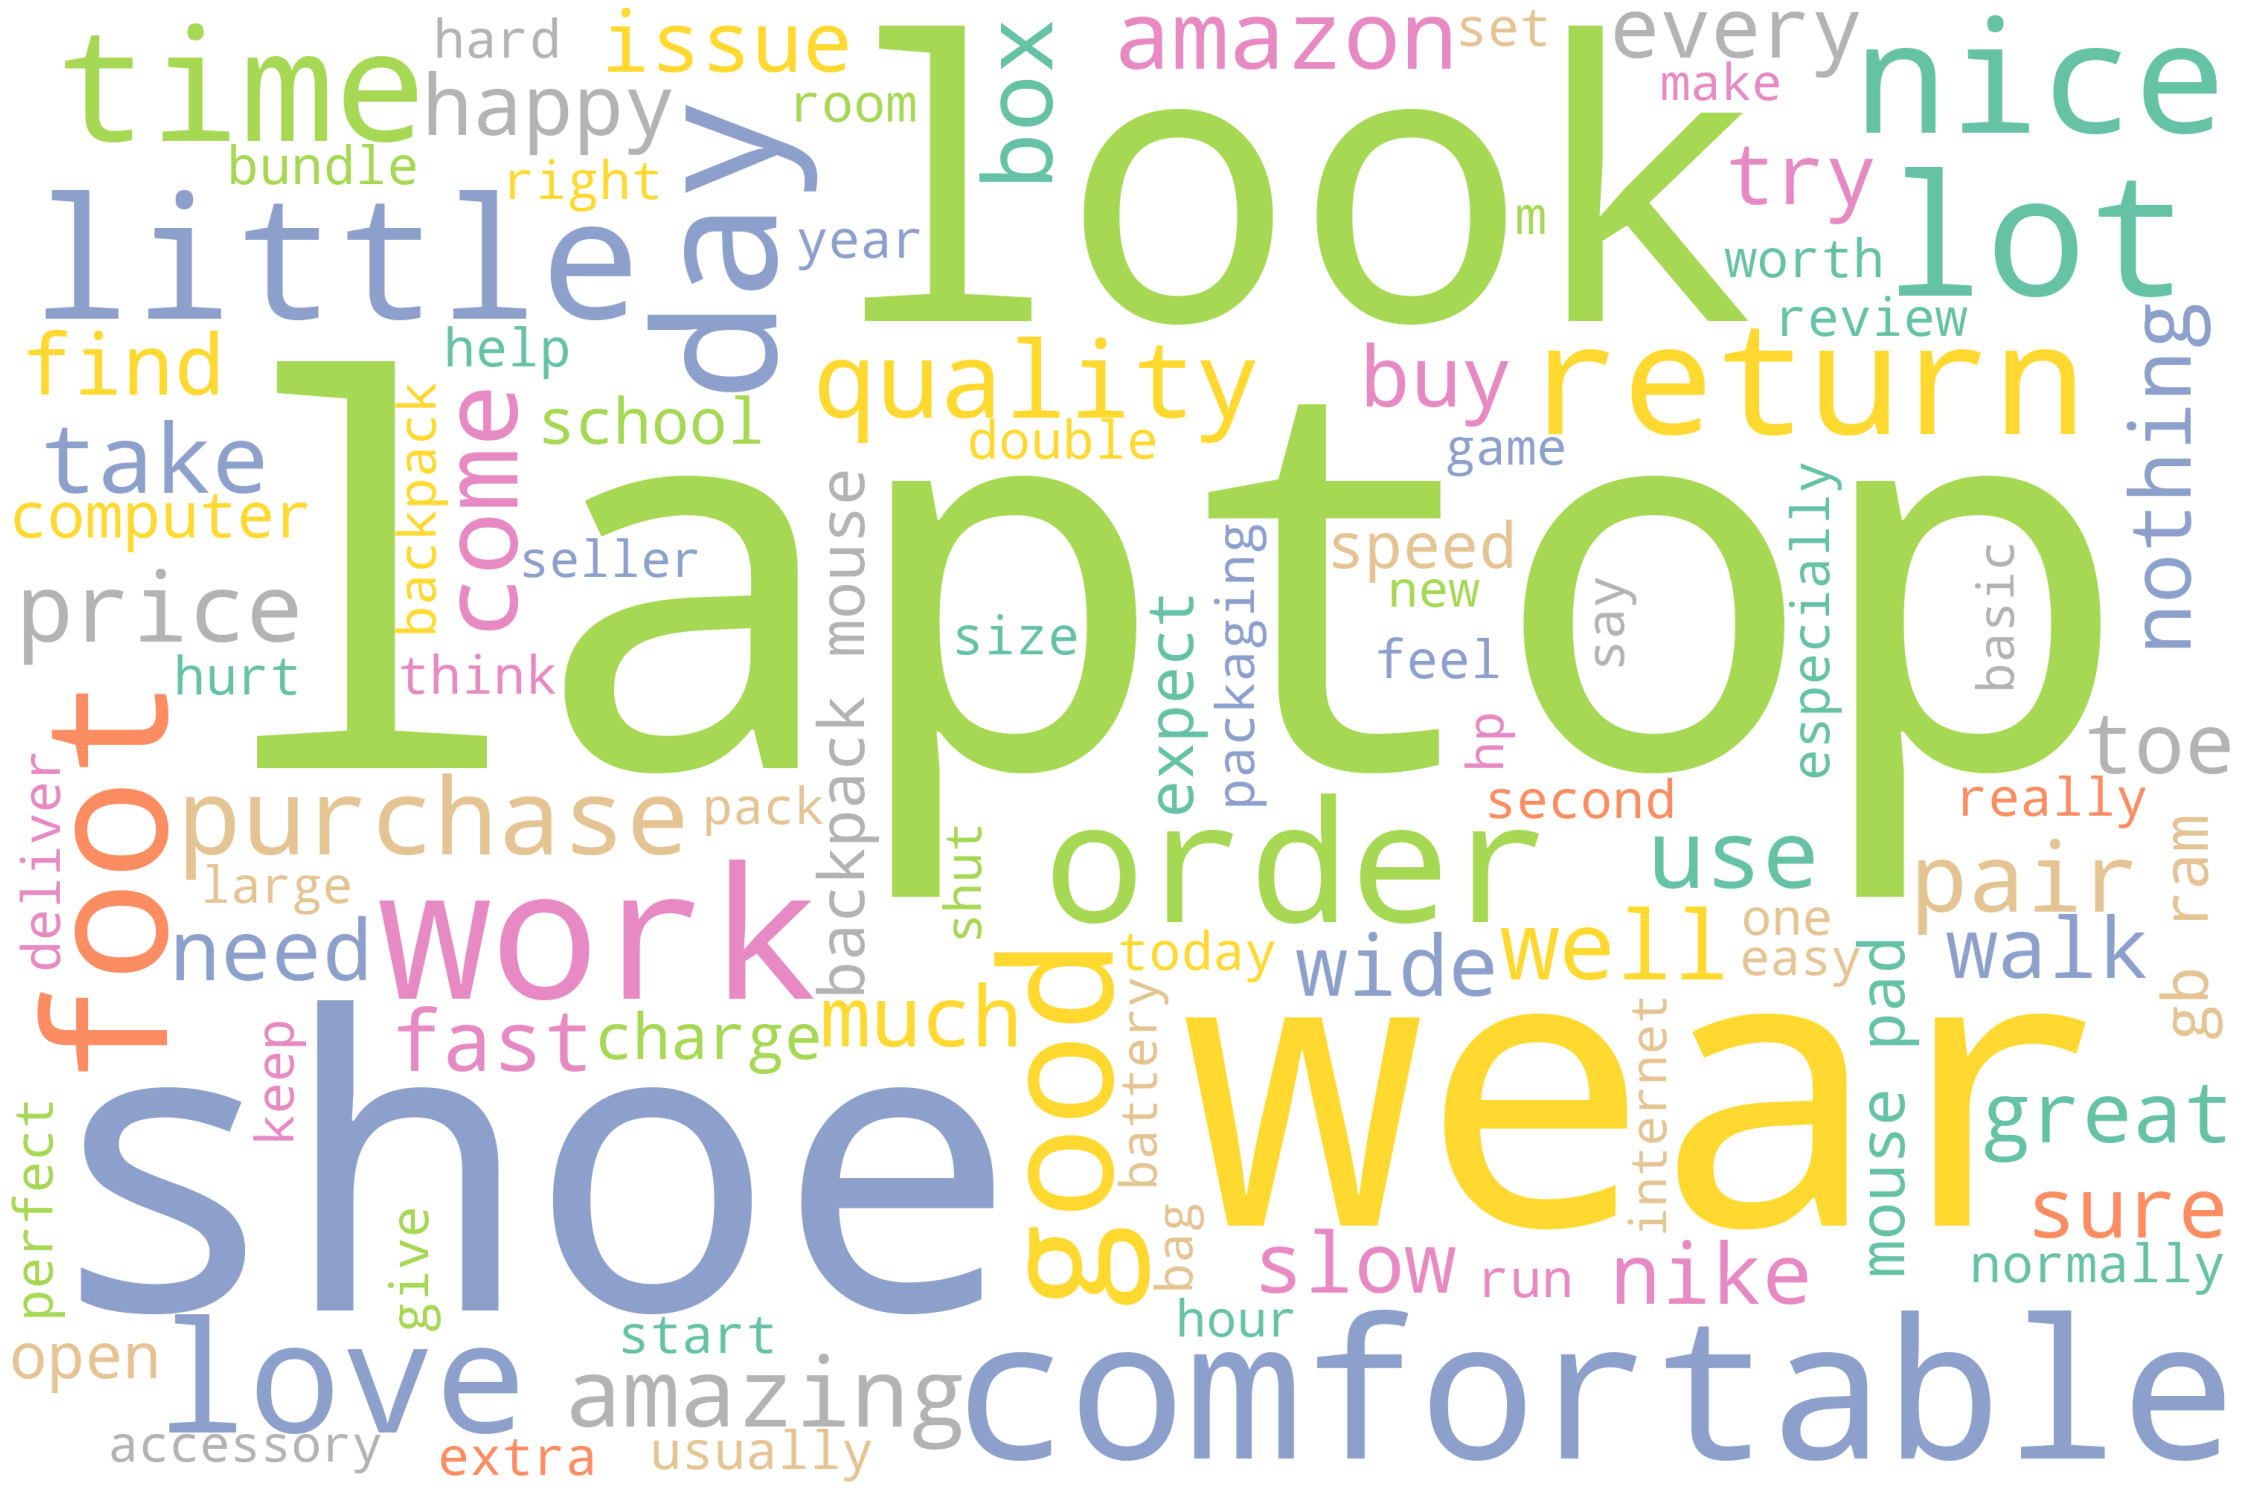

In [33]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

# Named Entity Recognition (NER)


In [34]:
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [35]:
for token in doc_block[100:200]:
    print(token,token.pos_)

find NOUN
shoe NOUN
comfortable ADJ
severe ADJ
fibromyalgia NOUN
help NOUN
medication NOUN
nothing PRON
work NOUN
so ADV
constantly ADV
look VERB
comfortable ADJ
clothing NOUN
sneaker NOUN
usually ADV
nike INTJ
be AUX
not PART
good ADJ
deciding NOUN
give VERB
pair NOUN
try VERB
happy ADJ
not PART
nice ADJ
look VERB
really ADV
comfortable ADJ
wear NOUN
day NOUN
today NOUN
lot NOUN
walk NOUN
zero NUM
issue NOUN
foot NOUN
hurt VERB
worth ADJ
extra ADJ
money NOUN
great ADJ
workout NOUN
shoe NOUN
very ADV
comfortable ADJ
this DET
second ADJ
pair NOUN
they PRON
comfortable ADJ
tennis NOUN
shoe NOUN
foot NOUN
day NOUN
do AUX
not PART
hurt AUX
normally ADV
wear VERB
85 NUM
shoe NOUN
wear VERB
9 NUM
find NOUN
toe NOUN
box NOUN
wider ADV
comfortable ADJ
especially ADV
wear VERB
little ADJ
thick ADJ
sock NOUN
roomy NOUN
enough ADJ
toe NOUN
scrunch NOUN
together ADV
do AUX
not PART
wide ADJ
foot NOUN
either CCONJ
this DET
second ADJ
pair NOUN
think VERB
shoe NOUN
comfy PROPN
be AUX
not PART
hard A

In [36]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['love', 'm', 'love', 'shoe', 'm', 'foot', 'lot', 'work', 'jog', 'wear', 'time', 're', 'wear', 'purchase', 'shoe', 'toe', 'area', 'read', 'review', 'heel', 'experience', 'shoe', 'love', 'run', 'look', 'foot', 'kill', 'walk', 'walk', 'gb', 'ram', 'ram', 'say', 'advertise', 'ram', 'packaging', 'box', 'package', 'come', 'start', 'move', 'set', 'give', 'star', 'ram', 'part', 'purchase', 'laptop', 'amazon', 'deliver', 'order', 'laptop', 'bundle', 'come', 'packaging', 'come', 'pad', 'pad', 'quality', 'mind', 'logo', 'performance', 'one', 'lot', 'game', 'self', 'employ', 'buy', 'laptop', 'work', 'need', 'internet', 'browsing', 'need', 'excel', 'report', 'computer', 'price', 'come', 'bonus', 'accessory', 'get', 'laptop', 'day', 'order', 'make', 'ask', 'seller', 'shut', 'minute', 'offer', 'refund', 'return', 'mess', 'cost', 'lot', 'think', 'state', 'shut', 'start']


In [37]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,laptop,18
1,shoe,10
2,wear,9
3,look,8
4,work,7
5,order,6
6,foot,6
7,lot,6
8,day,6
9,love,5


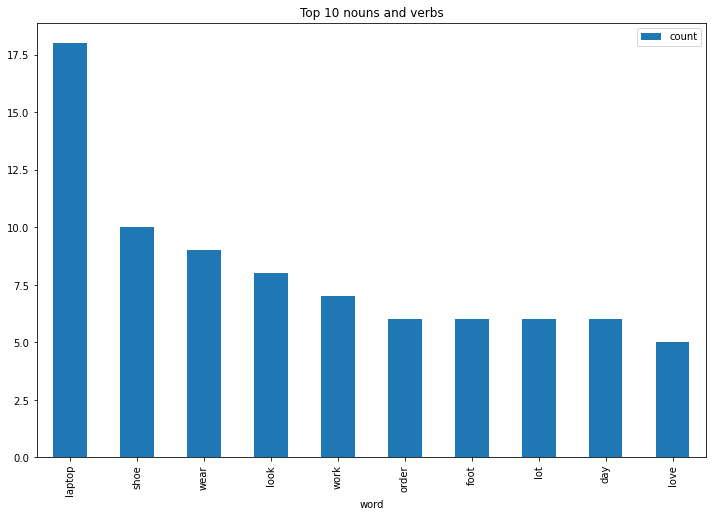

In [38]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

# Emotion Mining - Sentiment Analysis


In [39]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(reviews))
sentences

['I love the shoes they are true to size , I wear a 7 1/2 but I ordered a 8 to allow a little extra room and I got just that Just writing a rare review on these .',
 'I love Nike’s but my feet don’t usually.',
 'So I’ve ordered and returned a lot.',
 'Tried again lol and these ARE AMAZING comfortable.',
 'So much that I may order 3 more this year just to have them.',
 'The color is so cute and clean and sporty.',
 'I’m 99.9% sure I’ve dinally found a pair of Nikes I’m not going to return , fingers crossed 🤞😊 I have only run in them a couple of times, but so far they feel great.',
 'I normally wear a size 9, and I ordered a 9.5, and I’m glad I did.',
 'There is plenty of room, but not too much.',
 'The only thing that will take me getting used to is that they are slightly bulkier than my ASICS.',
 'Like any running shoes, I’m sure it will take a little bit of time to work out the stiffness and fully break them in, but they are amazing!',
 'I have a very hard time finding shoes that are 

In [40]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,"I love the shoes they are true to size , I wea..."
1,I love Nike’s but my feet don’t usually.
2,So I’ve ordered and returned a lot.
3,Tried again lol and these ARE AMAZING comforta...
4,So much that I may order 3 more this year just...
...,...
87,I tried twice to get Amazon to send me a new F...
88,If it wasnt too late to return this I would do...
89,Worst purchase of 2019 hands down!
90,Nothing to dislike about it.


In [41]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Affin.csv',sep=',',encoding='Latin-1')
affin

,Words,Value
0,2-faced,-1
1,2-faces,-1
2,abnormal,-1
3,abolish,-1
4,abominable,-1
...,...,...
7355,youthful,1
7356,zeal,1
7357,zenith,1
7358,zest,1


In [43]:
affinity_scores=affin.set_index('Words')['Value'].to_dict()
affinity_scores

{'2-faced': -1,
 '2-faces': -1,
 'abnormal': -1,
 'abolish': -1,
 'abominable': -1,
 'abominably': -1,
 'abominate': -1,
 'abomination': -1,
 'abort': -1,
 'aborted': -1,
 'aborts': -1,
 'abrade': -1,
 'abrasive': -1,
 'abrupt': -1,
 'abruptly': -1,
 'abscond': -1,
 'absence': -1,
 'absent-minded': -1,
 'absentee': -1,
 'absurd': -1,
 'absurdity': -1,
 'absurdly': -1,
 'absurdness': -1,
 'abuse': -1,
 'abused': -1,
 'abuses': -1,
 'abusive': -1,
 'abysmal': -1,
 'abysmally': -1,
 'abyss': -1,
 'accidental': -1,
 'accost': -1,
 'accursed': -1,
 'accusation': -1,
 'accusations': -1,
 'accuse': -1,
 'accuses': -1,
 'accusing': -1,
 'accusingly': -1,
 'acerbate': -1,
 'acerbic': -1,
 'acerbically': -1,
 'ache': -1,
 'ached': -1,
 'aches': -1,
 'achey': -1,
 'aching': -1,
 'acrid': -1,
 'acridly': -1,
 'acridness': -1,
 'acrimonious': -1,
 'acrimoniously': -1,
 'acrimony': -1,
 'adamant': -1,
 'adamantly': -1,
 'addict': -1,
 'addicted': -1,
 'addicting': -1,
 'addicts': -1,
 'admonish': -1

In [44]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [45]:
# manual testing
calculate_sentiment(text='good service')

1

In [46]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0     1
1     1
2     0
3     2
4     0
     ..
87    0
88    0
89   -1
90   -1
91    1
Name: sentiment_value, Length: 92, dtype: int64

In [47]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0     39
1      8
2      7
3      8
4     14
      ..
87    30
88    15
89     6
90     5
91     5
Name: word_count, Length: 92, dtype: int64

In [48]:
sent_df.sort_values(by='sentiment_value')


,sentence,sentiment_value,word_count
15,I wore them all day today did a lot of walking...,-2,19
90,Nothing to dislike about it.,-1,5
89,Worst purchase of 2019 hands down!,-1,6
28,A little pricey.,-1,3
86,It lags and takes forever to turn on it is so ...,-1,24
...,...,...,...
5,The color is so cute and clean and sporty.,3,9
58,the included laptop bag is good quality and wi...,3,17
82,"It is an amazing back to school laptop bundle,...",4,24
70,"Excellent computer, pretty easy setup, excelle...",4,8


In [49]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    92.000000
mean      0.684783
std       1.221864
min      -2.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       5.000000
Name: sentiment_value, dtype: float64

In [55]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count,index
2,So I’ve ordered and returned a lot.,0,7,2
4,So much that I may order 3 more this year just...,0,14,4
8,"There is plenty of room, but not too much.",0,9,8
9,The only thing that will take me getting used ...,-1,19,9
11,I have a very hard time finding shoes that are...,0,27,11
15,I wore them all day today did a lot of walking...,-2,19,15
18,This is my second pair.,0,5,18
19,They are the most comfortable tennis shoes I o...,0,21,19
20,I normally wear a 8.5 but in this shoe I wear ...,0,13,20
22,I don't have a wide foot either.,0,7,22


In [56]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count,index
0,"I love the shoes they are true to size , I wea...",1,39,0
1,I love Nike’s but my feet don’t usually.,1,8,1
3,Tried again lol and these ARE AMAZING comforta...,2,8,3
5,The color is so cute and clean and sporty.,3,9,5
6,I’m 99.9% sure I’ve dinally found a pair of Ni...,1,35,6
7,"I normally wear a size 9, and I ordered a 9.5,...",1,16,7
10,"Like any running shoes, I’m sure it will take ...",1,28,10
12,So I am constantly looking for comfortable clo...,1,10,12
13,Usually nike isnt good for me but after decidi...,2,20,13
14,Not only are they nice looking but they really...,2,11,14


In [60]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,"I love the shoes they are true to size , I wea...",1,39,0
1,I love Nike’s but my feet don’t usually.,1,8,1
2,So I’ve ordered and returned a lot.,0,7,2
3,Tried again lol and these ARE AMAZING comforta...,2,8,3
4,So much that I may order 3 more this year just...,0,14,4
...,...,...,...,...
87,I tried twice to get Amazon to send me a new F...,0,30,87
88,If it wasnt too late to return this I would do...,0,15,88
89,Worst purchase of 2019 hands down!,-1,6,89
90,Nothing to dislike about it.,-1,5,90


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

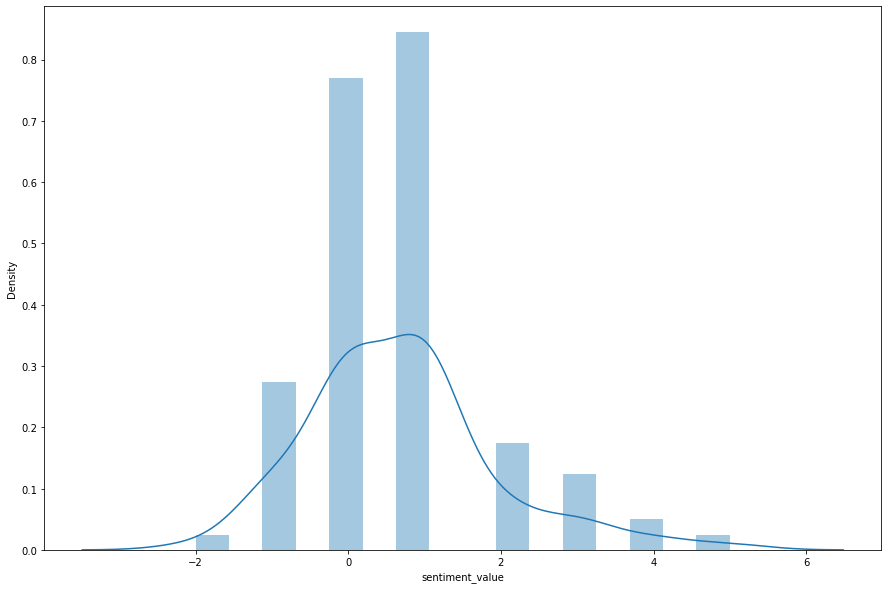

In [61]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

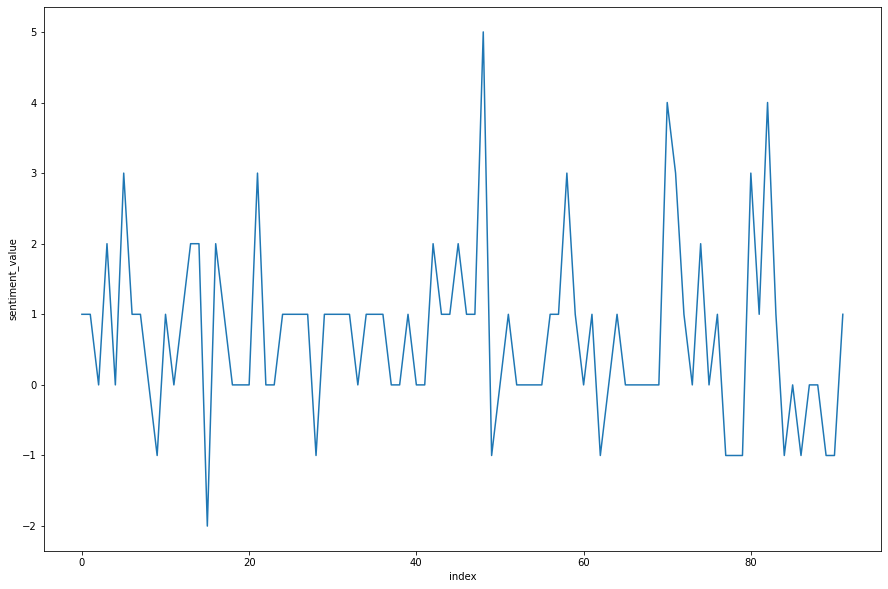

In [62]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)